# 男生藏多少私房钱女生可以容忍！
## Vcamp团队任务
### 组员：刘刚，李宜烜，聂海，张琮，程林，顾岩，陈文燕，李思琪（无顺序）

## 生成数据，自己构造

In [61]:
import pandas as pd
import random
import numpy as np
sample_num = 256
feature_num = 9
df = pd.DataFrame(data=None,columns=range(0,feature_num), index=range(0,sample_num))
df.columns = ['w_age','w_salary','w_face','w_char','m_age','m_salary','m_face','m_char','pri-money']
index_line = [i for i in range(0,sample_num)]
df.index = index_line
for i in range(0,feature_num):
    if "salary" in df.columns[i] and 'pri-money' not in df.columns[i]: 
        df[df.columns[i]] = [random.uniform(0,5) for i in range(0,sample_num)]
    elif 'pri-money' not in df.columns[i]:
        df[df.columns[i]] = [random.uniform(0,3) for i in range(0,sample_num)]
df.head()

,w_age,w_salary,w_face,w_char,m_age,m_salary,m_face,m_char,pri-money
0,2.656773,4.488884,1.386232,1.901661,0.750170,4.813755,0.304983,0.972414,NaN
1,2.087105,4.860872,0.738657,1.816164,0.033609,1.441217,2.963096,0.111394,NaN
2,2.205231,2.004046,0.073831,0.416520,2.635808,0.851412,0.882568,2.893771,NaN
3,1.378556,0.786978,1.510135,2.234781,2.446611,4.373042,2.761783,1.171811,NaN
4,1.884050,1.552769,0.827750,2.603767,1.197961,1.656563,2.171830,0.325525,NaN


In [75]:
penc = [0.105, 0.175, 0.025, 0.185, 0.135, 0.145, 0.045, 0.185]
tmp = [0 for i in range(0,sample_num)]
for i in range(len(penc)):
    tmp += penc[i]*df[df.columns[i]]
df['pri-money'] = tmp
df['pri-money'][df['pri-money']<1]=0
# for i in range(0,df.shape[0]):
#     if df.loc[i,'pri-money']>1 and df.loc[i,'pri-money']<2:
#         df[i,'pri-money']=1
df['pri-money'][(df['pri-money']>1) & (df['pri-money']<2)]=1
df['pri-money'][df['pri-money']>2]=2
df.head()
#1.681030*penc[0]+3.071826*penc[1]+1.125127*penc[2]+0.883734*penc[3]+0.740135*penc[4]+0.319263*penc[5]+1.619885*penc[6]+2.922581*penc[7]

,w_age,w_salary,w_face,w_char,m_age,m_salary,m_face,m_char,pri-money
0,2.656773,4.488884,1.386232,1.901661,0.750170,4.813755,0.304983,0.972414,2.0
1,2.087105,4.860872,0.738657,1.816164,0.033609,1.441217,2.963096,0.111394,1.0
2,2.205231,2.004046,0.073831,0.416520,2.635808,0.851412,0.882568,2.893771,1.0
3,1.378556,0.786978,1.510135,2.234781,2.446611,4.373042,2.761783,1.171811,2.0
4,1.884050,1.552769,0.827750,2.603767,1.197961,1.656563,2.171830,0.325525,1.0


## 使用csv数据

In [4]:
!pip install xlrd

     |████████████████████████████████| 112kB 203kB/s eta 0:00:01


In [142]:
# 筛选数据
import pandas as pd
import random
import numpy as np
data = pd.read_excel('data_7-16.xls')#.drop(["性别",'序号','填表序号'],axis = 1)
data['结果'] = data['结果']-1
print(data.head())
print(int(data['填表序号'].max()))
valid_data = []
for i in range(int(data['填表序号'].max())):
    if data[data['填表序号']==i]['结果'].max()==data[data['填表序号']==i]['结果'].min():
        valid_data.append(i)
data = data[~data['填表序号'].isin(valid_data)]
data = data.drop(["性别",'序号','填表序号'],axis = 1)
print(data.shape)

   序号  填表序号  性别  女生外貌  女生星座  女生婚姻状态  女生性格  女生消费观念  是否接受藏私房钱  女生月收入  男生收入  \
0   1     1   2     2     2       3     3       2         2      3     1   
1   2     1   2     2     2       3     3       2         2      3     1   
2   3     1   2     2     2       3     3       2         2      3     1   
3   4     1   2     2     2       3     3       2         2      3     1   
4   5     1   2     2     2       3     3       2         2      3     2   

   男生消费观  男生外貌  结果  
0      1     1   4  
1      1     2   3  
2      2     1   1  
3      2     2   1  
4      1     1   3  
45
(208, 11)


In [143]:

data.rename(columns={'女生外貌':'w_face','女生星座':'w_star','女生婚姻状态':'w_wedding','女生性格':'w_character',
                   '女生消费观念':'w_buy','是否接受藏私房钱':'w_is_pri-money','女生月收入':'w_salary','男生收入':'m_salary',
                    '男生消费观':'m_buy','男生外貌':'m_face','结果':'pri-money'}, inplace = True)
data['pri-money'][data['pri-money']<1.5]=0
#data['pri-money'][(data['pri-money']>0.5) & (data['pri-money']<1.5)]=1
data['pri-money'][(data['pri-money']>1.5) & (data['pri-money']<3.5)]=1
data['pri-money'][data['pri-money']>3.5]=2
print(data.head())
print(data.shape)

   w_face  w_star  w_wedding  w_character  w_buy  w_is_pri-money  w_salary  \
0       2       2          3            3      2               2         3   
1       2       2          3            3      2               2         3   
2       2       2          3            3      2               2         3   
3       2       2          3            3      2               2         3   
4       2       2          3            3      2               2         3   

   m_salary  m_buy  m_face  pri-money  
0         1      1       1          2  
1         1      1       2          1  
2         1      2       1          0  
3         1      2       2          0  
4         2      1       1          1  
(208, 11)


### 生成训练集，其中test传入待测试的特征，即交互界面上输入的特征

In [144]:
import math
#df = data.sample(frac=1).reset_index(drop=True) #打乱样本
df = data
train_num = 160
valid_num = 200

train_all = df.drop(['pri-money'],axis = 1)
train_all_y = df['pri-money']
print(train_all.head())

train = df[0:train_num]
tmp = df[valid_num:]  #test
tmp2 = df[train_num:valid_num] #valid
test_y = tmp['pri-money'].values
valid_y = tmp2['pri-money'].values
valid = np.array(tmp2.drop(['pri-money'],axis = 1))
test = np.array(tmp.drop(['pri-money'],axis = 1))
train_y = train['pri-money']
# test_y = test['pri-money']
train = train.drop(['pri-money'],axis = 1)
#train = round(train+0.5)
print(train.shape,'\n',test)
print(valid_y)
train.head()

   w_face  w_star  w_wedding  w_character  w_buy  w_is_pri-money  w_salary  \
0       2       2          3            3      2               2         3   
1       2       2          3            3      2               2         3   
2       2       2          3            3      2               2         3   
3       2       2          3            3      2               2         3   
4       2       2          3            3      2               2         3   

   m_salary  m_buy  m_face  
0         1      1       1  
1         1      1       2  
2         1      2       1  
3         1      2       2  
4         2      1       1  
(160, 10) 
 [[2 2 2 2 2 2 2 1 1 1]
 [2 2 2 2 2 2 2 1 1 2]
 [2 2 2 2 2 2 2 1 2 1]
 [2 2 2 2 2 2 2 1 2 2]
 [2 2 2 2 2 2 2 2 1 1]
 [2 2 2 2 2 2 2 2 1 2]
 [2 2 2 2 2 2 2 2 2 1]
 [2 2 2 2 2 2 2 2 2 2]]
[2 0 2 0 2 0 2 0 1 0 1 0 1 0 1 0 2 1 1 0 1 1 0 0 2 2 1 1 0 0 0 0 2 1 1 1 1
 0 1 0]


,w_face,w_star,w_wedding,w_character,w_buy,w_is_pri-money,w_salary,m_salary,m_buy,m_face
0,2,2,3,3,2,2,3,1,1,1
1,2,2,3,3,2,2,3,1,1,2
2,2,2,3,3,2,2,3,1,2,1
3,2,2,3,3,2,2,3,1,2,2
4,2,2,3,3,2,2,3,2,1,1


In [27]:
# train = df[0:200]
# test = df[200:df.shape[0]]
# train = df
# train_y = train['pri-money']
# # test_y = test['pri-money']
# train = train.drop(['pri-money'],axis = 1)
# test = test.drop(['pri-money'],axis = 1)
#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(train.shape))
# print("The test data size before dropping Id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (220, 10) 


In [28]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pylab as plt
%matplotlib inline

## 定义交叉验证函数

In [8]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, train_y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)
def rmsle_cv_stacking(model,s_train,s_train_y):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, s_train, s_train_y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

## 建立模型

In [9]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=2000,
                              max_bin = 10, bagging_fraction = 0.6,
                              bagging_freq = 10, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =8, min_sum_hessian_in_leaf = 8,verbose_eval=1)

In [10]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.8603, gamma=0.0168, 
                             learning_rate=0.06, max_depth=1, 
                             min_child_weight=1.0817, n_estimators=2200,
                             reg_alpha=0.0640, reg_lambda=0.8571,
                             subsample=0.1003, silent=1,
                             random_state =7, nthread = -1)


In [11]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.07,
                                   max_depth=1, max_features='sqrt',
                                   min_samples_leaf=8, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [12]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [13]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

## 单模型验证和打分

LGBM score: 0.3271 (0.0222)

[2.09329959 1.32764899 0.89857338 1.46825362 0.96438079 2.03378889
 1.51168588 1.74327655 1.67729716 1.31519394]


<Figure size 864x432 with 0 Axes>

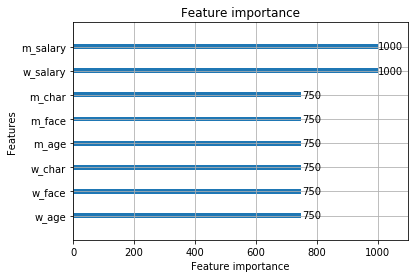

In [78]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))


model_lgb.fit(train,train_y)
print(model_lgb.predict(train.values)[0:10])

plt.figure(figsize=(12,6))
lgb.plot_importance(model_lgb,max_num_features=10)

#### 分类lgb

[1]	valid_0's multi_logloss: 1.06668
Training until validation scores don't improve for 50 rounds.
[2]	valid_0's multi_logloss: 1.06026
[3]	valid_0's multi_logloss: 1.05393
[4]	valid_0's multi_logloss: 1.04817
[5]	valid_0's multi_logloss: 1.04247
[6]	valid_0's multi_logloss: 1.0373
[7]	valid_0's multi_logloss: 1.03214
[8]	valid_0's multi_logloss: 1.02749
[9]	valid_0's multi_logloss: 1.02281
[10]	valid_0's multi_logloss: 1.01862
[11]	valid_0's multi_logloss: 1.01438
[12]	valid_0's multi_logloss: 1.0096
[13]	valid_0's multi_logloss: 1.00577
[14]	valid_0's multi_logloss: 1.0014
[15]	valid_0's multi_logloss: 0.997934
[16]	valid_0's multi_logloss: 0.99394
[17]	valid_0's multi_logloss: 0.990752
[18]	valid_0's multi_logloss: 0.987083
[19]	valid_0's multi_logloss: 0.983419
[20]	valid_0's multi_logloss: 0.980063
[21]	valid_0's multi_logloss: 0.977511
[22]	valid_0's multi_logloss: 0.973671
[23]	valid_0's multi_logloss: 0.97194
[24]	valid_0's multi_logloss: 0.969113
[25]	valid_0's multi_logloss: 

[99]	valid_0's multi_logloss: 1.00068
[100]	valid_0's multi_logloss: 1.0016
[101]	valid_0's multi_logloss: 1.00159
[102]	valid_0's multi_logloss: 1.0013
[103]	valid_0's multi_logloss: 1.00215
[104]	valid_0's multi_logloss: 1.003
[105]	valid_0's multi_logloss: 1.00347
[106]	valid_0's multi_logloss: 1.00347
[107]	valid_0's multi_logloss: 1.00364
[108]	valid_0's multi_logloss: 1.00445
[109]	valid_0's multi_logloss: 1.00564
[110]	valid_0's multi_logloss: 1.00465
[111]	valid_0's multi_logloss: 1.00566
[112]	valid_0's multi_logloss: 1.0054
[113]	valid_0's multi_logloss: 1.006
[114]	valid_0's multi_logloss: 1.00653
[115]	valid_0's multi_logloss: 1.00661
[116]	valid_0's multi_logloss: 1.00681
[117]	valid_0's multi_logloss: 1.00644
[118]	valid_0's multi_logloss: 1.00725
[119]	valid_0's multi_logloss: 1.00607
[120]	valid_0's multi_logloss: 1.00635
[121]	valid_0's multi_logloss: 1.00693
[122]	valid_0's multi_logloss: 1.00734
Early stopping, best iteration is:
[72]	valid_0's multi_logloss: 0.99141

[198]	valid_0's multi_logloss: 0.756653
[199]	valid_0's multi_logloss: 0.756713
[200]	valid_0's multi_logloss: 0.755339
[201]	valid_0's multi_logloss: 0.756256
[202]	valid_0's multi_logloss: 0.756902
[203]	valid_0's multi_logloss: 0.756049
[204]	valid_0's multi_logloss: 0.755975
[205]	valid_0's multi_logloss: 0.756554
[206]	valid_0's multi_logloss: 0.756739
[207]	valid_0's multi_logloss: 0.756847
[208]	valid_0's multi_logloss: 0.756434
[209]	valid_0's multi_logloss: 0.756998
[210]	valid_0's multi_logloss: 0.757333
[211]	valid_0's multi_logloss: 0.755539
[212]	valid_0's multi_logloss: 0.755499
[213]	valid_0's multi_logloss: 0.755476
[214]	valid_0's multi_logloss: 0.755696
[215]	valid_0's multi_logloss: 0.754276
[216]	valid_0's multi_logloss: 0.754829
[217]	valid_0's multi_logloss: 0.754728
[218]	valid_0's multi_logloss: 0.753961
[219]	valid_0's multi_logloss: 0.753891
[220]	valid_0's multi_logloss: 0.753582
[221]	valid_0's multi_logloss: 0.753874
[222]	valid_0's multi_logloss: 0.752993


[56]	valid_0's multi_logloss: 1.12657
[57]	valid_0's multi_logloss: 1.12689
[58]	valid_0's multi_logloss: 1.12619
[59]	valid_0's multi_logloss: 1.12655
[60]	valid_0's multi_logloss: 1.12664
[61]	valid_0's multi_logloss: 1.12656
[62]	valid_0's multi_logloss: 1.12675
[63]	valid_0's multi_logloss: 1.12676
[64]	valid_0's multi_logloss: 1.12653
[65]	valid_0's multi_logloss: 1.1275
[66]	valid_0's multi_logloss: 1.12749
[67]	valid_0's multi_logloss: 1.128
[68]	valid_0's multi_logloss: 1.12854
[69]	valid_0's multi_logloss: 1.12882
[70]	valid_0's multi_logloss: 1.12906
[71]	valid_0's multi_logloss: 1.12962
[72]	valid_0's multi_logloss: 1.13053
[73]	valid_0's multi_logloss: 1.13078
[74]	valid_0's multi_logloss: 1.13116
[75]	valid_0's multi_logloss: 1.13024
[76]	valid_0's multi_logloss: 1.13045
[77]	valid_0's multi_logloss: 1.12925
[78]	valid_0's multi_logloss: 1.12836
[79]	valid_0's multi_logloss: 1.12855
[80]	valid_0's multi_logloss: 1.12824
[81]	valid_0's multi_logloss: 1.12851
[82]	valid_0's 

<Figure size 864x432 with 0 Axes>

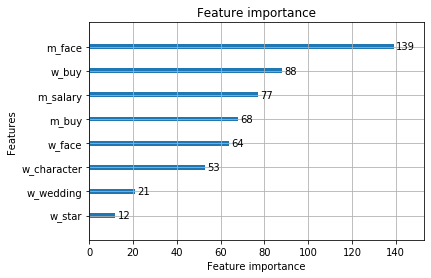

In [145]:

from sklearn.model_selection import KFold
kfold_res = []
kf = KFold(n_splits=5)
for train_index, valid_index in kf.split(train_all):
    
    train_data=lgb.Dataset(train_all.iloc[train_index],label=train_all_y.iloc[train_index])
    validation_data=lgb.Dataset(train_all.iloc[valid_index],label=train_all_y.iloc[valid_index])
    params={
        'learning_rate':0.03,
        'lambda_l1':0.1,
        'lambda_l2':0.9,
        'max_depth':2,
        'objective':'multiclass',
        "num_boost_round":2000,
        "early_stopping_round":50,
        "verbose_eval":50,
        'num_class':3,  #lightgbm.basic.LightGBMError: b‘Number of classes should be specified and greater than 1 for multiclass training‘
    }
    clf=lgb.train(params,train_data,valid_sets=[validation_data])
    from sklearn.metrics import roc_auc_score,accuracy_score
    y_pred=clf.predict(train_all.iloc[valid_index].values)
    y_pred=[list(x).index(max(x)) for x in y_pred]
    #print(list(y_pred),'\n\n',list(valid_y))
    kfold_res.append(accuracy_score(train_all_y.iloc[valid_index].values,y_pred))
print(kfold_res)
plt.figure(figsize=(12,6))
lgb.plot_importance(clf,max_num_features=10)

In [339]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.3181 (0.0182)



In [340]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.3185 (0.0189)



In [341]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.3111 (0.0157)



In [342]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.3111 (0.0157)



## 模型融合Stacking test

In [370]:
base_models = (model_lgb, GBoost, ENet)
out_of_fold_predictions_test = np.zeros((test.shape[0], len(base_models)))
def stacking_fit(base_models, meta_model, X, y):
        base_models_ = [list() for x in base_models]
        meta_model_ = clone(meta_model)
        kfold = KFold(n_splits=5, shuffle=True, random_state=156)
        
        out_of_fold_predictions = np.zeros((X.shape[0], len(base_models)))
        
        all_models_list = [[] for i in range(0,len(base_models))]
        for i, model in enumerate(base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                all_models_list[i].append(instance)
                y_pred = instance.predict(X[holdout_index])
                ## test_pred = instance.predict(test)
                out_of_fold_predictions[holdout_index, i] = y_pred
                ## out_of_fold_predictions_test[:, i] += test_pred
        return out_of_fold_predictions, all_models_list#out_of_fold_predictions_test/5
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        ##meta_model_.fit(out_of_fold_predictions, y)
        ##print(out_of_fold_predictions.shape)
out_of_fold_predictions, all_models_list = stacking_fit(base_models,
                             meta_model = lasso, X=train.values, y=train_y )
print(out_of_fold_predictions[0:5])

[[2.63520707 2.61662476 2.60549062]
 [2.65387132 2.62761558 2.62940182]
 [2.59306556 2.5842191  2.68748663]
 [2.62026492 2.60123315 2.64556676]
 [2.13401848 2.12228188 2.2653964 ]]


In [352]:
score = rmsle_cv_stacking(lasso, out_of_fold_predictions, train_y)
print("\nStacking score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Stacking score: 0.3189 (0.0103)



## Stacking predict
**np.round(lasso.predict(out_of_fold_predictions_test) 为界面输出值**

In [379]:
tmp_res_matrix = np.zeros((len(all_models_list), len(all_models_list[0]))) 
for i in range(len(all_models_list)):
    for j in range(len(all_models_list[0])):
        tmp_res_matrix[i][j] = all_models_list[i][j].predict(test)
out_of_fold_predictions_test = (np.array(tmp_res_matrix).sum(axis=1)/len(all_models_list[0]))[np.newaxis,:]
lasso.fit(out_of_fold_predictions, train_y)
print("test_predict:",np.round(lasso.predict(out_of_fold_predictions_test)))
## print('true_test_y:',test_y.values)

test_predict: [2.]


## 平均融合（测试用的，忽略）

In [306]:
class VotingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        for model in self.models_:
            model.fit(X, y)

        return self
    
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [307]:
averaged_models = AveragingModels(models = (model_lgb, GBoost, model_xgb))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.3245 (0.0184)

